# Computergestützte Mathematik zur Analysis

&copy; Rüdiger W. Braun

17.01.2019

Bitte melden Sie sich im Studierendenportal zur Prüfung an

In [1]:
from sympy import *
init_printing()

Jordansche Normalform

In [2]:
C = Matrix(3, 3, [-4, -2, -3, 5, 3, 3, 5, 2, 4])
C

⎡-4  -2  -3⎤
⎢          ⎥
⎢5   3   3 ⎥
⎢          ⎥
⎣5   2   4 ⎦

In [4]:
C.eigenvects()

⎡⎛      ⎡⎡-2/5⎤  ⎡-3/5⎤⎤⎞⎤
⎢⎜      ⎢⎢    ⎥  ⎢    ⎥⎥⎟⎥
⎢⎜1, 3, ⎢⎢ 1  ⎥, ⎢ 0  ⎥⎥⎟⎥
⎢⎜      ⎢⎢    ⎥  ⎢    ⎥⎥⎟⎥
⎣⎝      ⎣⎣ 0  ⎦  ⎣ 1  ⎦⎦⎠⎦

Das ist einer zu wenig.

In [5]:
T, J = C.jordan_form()
T, J

⎛⎡-5  1  -2/5⎤  ⎡1  1  0⎤⎞
⎜⎢           ⎥  ⎢       ⎥⎟
⎜⎢5   0   1  ⎥, ⎢0  1  0⎥⎟
⎜⎢           ⎥  ⎢       ⎥⎟
⎝⎣5   0   0  ⎦  ⎣0  0  1⎦⎠

In [6]:
T * J * T**(-1) == C

True

Die Jordanform hängt unstetig von den Daten ab

In [8]:
epsilon = Symbol('epsilon')
C [0,0] += epsilon
C

⎡2⋅ε - 4  -2  -3⎤
⎢               ⎥
⎢   5     3   3 ⎥
⎢               ⎥
⎣   5     2   4 ⎦

In [9]:
T, Je = C.jordan_form()
Je

⎡1            0                       0           ⎤
⎢                                                 ⎥
⎢          ___________                            ⎥
⎢         ╱  2                                    ⎥
⎢0  ε - ╲╱  ε  - 10⋅ε  + 1            0           ⎥
⎢                                                 ⎥
⎢                                  ___________    ⎥
⎢                                 ╱  2            ⎥
⎣0            0             ε + ╲╱  ε  - 10⋅ε  + 1⎦

In [10]:
Je.limit(epsilon, 0), J

⎛⎡1  0  0⎤  ⎡1  1  0⎤⎞
⎜⎢       ⎥  ⎢       ⎥⎟
⎜⎢0  1  0⎥, ⎢0  1  0⎥⎟
⎜⎢       ⎥  ⎢       ⎥⎟
⎝⎣0  0  1⎦  ⎣0  0  1⎦⎠

Rang einer Matrix

In [11]:
M = Matrix(3, 3, range(1,10))
M

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

In [12]:
M.rank()

In [13]:
x = Symbol('x')
y = Symbol('y')
M0 = Matrix(3, 2, [2*x+2, 2*y-2, 2*x+2, -2*y+2, y-1, x+1])
M = M0.copy()
M

⎡2⋅x + 2  2⋅y - 2 ⎤
⎢                 ⎥
⎢2⋅x + 2  -2⋅y + 2⎥
⎢                 ⎥
⎣ y - 1    x + 1  ⎦

In [14]:
M.rank()

Glauben wir das?

In [17]:
def ziehe_erste_zeile_ab(m, j):
    "m ist das j-te Element der ausgewählten Zeile"
    return m - M[0,j]

In [16]:
M.row_op(1, ziehe_erste_zeile_ab)
M

⎡2⋅x + 2  2⋅y - 2 ⎤
⎢                 ⎥
⎢   0     -4⋅y + 4⎥
⎢                 ⎥
⎣ y - 1    x + 1  ⎦

In [19]:
def mache_multiplizierer(faktor):   # Factory
    def func(m, j):
        return m*faktor
    return func

In [20]:
M.row_op(0, mache_multiplizierer(y-1))
M.row_op(2, mache_multiplizierer(2*x+2))
M

⎡(2⋅x + 2)⋅(y - 1)  (y - 1)⋅(2⋅y - 2)⎤
⎢                                    ⎥
⎢        0              -4⋅y + 4     ⎥
⎢                                    ⎥
⎣(2⋅x + 2)⋅(y - 1)  (x + 1)⋅(2⋅x + 2)⎦

In [21]:
M.row_op(2, ziehe_erste_zeile_ab)
M

⎡(2⋅x + 2)⋅(y - 1)            (y - 1)⋅(2⋅y - 2)          ⎤
⎢                                                        ⎥
⎢        0                        -4⋅y + 4               ⎥
⎢                                                        ⎥
⎣        0          (x + 1)⋅(2⋅x + 2) - (y - 1)⋅(2⋅y - 2)⎦

In [22]:
M.expand()

⎡                              2               ⎤
⎢2⋅x⋅y - 2⋅x + 2⋅y - 2      2⋅y  - 4⋅y + 2     ⎥
⎢                                              ⎥
⎢          0                   -4⋅y + 4        ⎥
⎢                                              ⎥
⎢                          2            2      ⎥
⎣          0            2⋅x  + 4⋅x - 2⋅y  + 4⋅y⎦

In [23]:
M.subs(y,1)

⎡0          0        ⎤
⎢                    ⎥
⎢0          0        ⎥
⎢                    ⎥
⎣0  (x + 1)⋅(2⋅x + 2)⎦

In [24]:
M.subs(y, 1).subs(x,-1)

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

Diese Matrix hat nicht den Rang 2.

Das heißt aber nicht viel, denn wir haben eine Zeile der Matrix mit $y-1$ und eine mit $x+1$ multipliziert.

In [27]:
M0.subs(x,-1).subs(y,1)

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

Kein Fehler von `sympy`:

Die Matrix wird als Matrix über dem Körper der rationalen Funktionen in $x$ und $y$ verstanden.  Dort hat sie vollen Rang.

Normen von Vektoren und Matrizen

In [28]:
v = Matrix([1,2,3])

In [29]:
v.norm()

In [30]:
sqrt((v.T*v)[0])

In [31]:
v.norm(oo)

In [32]:
v.norm(1)

In [33]:
A = Matrix(3, 3, range(1,10))

In [34]:
A.norm()

In [35]:
from sympy.abc import a,b,c,d

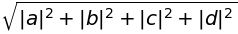

In [36]:
Matrix(2,2,[a,b,c,d]).norm()

Die Frobeniusnorm ist submultiplikativ, also $\Vert AB \Vert \le \Vert A \Vert \Vert B \Vert$, aber keine Matrixnorm (bzw. Operatornorm) im Sinne der Analysis II.

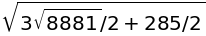

In [37]:
A.norm(2)

In [38]:
(A.T*A).eigenvals()

Vektoranalysis

In [39]:
from sympy.abc import x, y, z
xyz = [x,y,z]

In [40]:
f = exp(x*x + 2*y*y + 3*z*z)
f

In [41]:
J = Matrix([f]).jacobian(xyz)
J

⎡      2      2      2        2      2      2        2      2      2⎤
⎢     x  + 2⋅y  + 3⋅z        x  + 2⋅y  + 3⋅z        x  + 2⋅y  + 3⋅z ⎥
⎣2⋅x⋅ℯ                  4⋅y⋅ℯ                  6⋅z⋅ℯ                ⎦

Das ist der Gradient.

In [42]:
A = Matrix([f, f**2, f**3])
A.jacobian(xyz)

⎡       2      2      2          2      2      2           2      2      2  ⎤
⎢      x  + 2⋅y  + 3⋅z          x  + 2⋅y  + 3⋅z           x  + 2⋅y  + 3⋅z   ⎥
⎢ 2⋅x⋅ℯ                    4⋅y⋅ℯ                     6⋅z⋅ℯ                  ⎥
⎢                                                                           ⎥
⎢        2      2      2          2      2      2            2      2      2⎥
⎢     2⋅x  + 4⋅y  + 6⋅z        2⋅x  + 4⋅y  + 6⋅z          2⋅x  + 4⋅y  + 6⋅z ⎥
⎢4⋅x⋅ℯ                    8⋅y⋅ℯ                     12⋅z⋅ℯ                  ⎥
⎢                                                                           ⎥
⎢        2      2      2           2      2      2           2      2      2⎥
⎢     3⋅x  + 6⋅y  + 9⋅z         3⋅x  + 6⋅y  + 9⋅z         3⋅x  + 6⋅y  + 9⋅z ⎥
⎣6⋅x⋅ℯ                    12⋅y⋅ℯ                    18⋅z⋅ℯ                  ⎦

Jacobi-Matrix

In [43]:
H = hessian(f, xyz)
H

⎡       2      2      2       2      2      2                     2      2    
⎢   2  x  + 2⋅y  + 3⋅z       x  + 2⋅y  + 3⋅z                     x  + 2⋅y  + 3
⎢4⋅x ⋅ℯ                 + 2⋅ℯ                             8⋅x⋅y⋅ℯ             
⎢                                                                             
⎢                  2      2      2                     2      2      2       2
⎢                 x  + 2⋅y  + 3⋅z                  2  x  + 2⋅y  + 3⋅z       x 
⎢          8⋅x⋅y⋅ℯ                             16⋅y ⋅ℯ                 + 4⋅ℯ  
⎢                                                                             
⎢                   2      2      2                               2      2    
⎢                  x  + 2⋅y  + 3⋅z                               x  + 2⋅y  + 3
⎣          12⋅x⋅z⋅ℯ                                      24⋅y⋅z⋅ℯ             

  2                                2      2      2           ⎤
⋅z                                x  + 2⋅y  + 3⋅z            ⎥
    

Hesse-Matrix

In [44]:
H == H.T

True

In [45]:
f = Function('f')
hessian(f(x,y,z), xyz)

⎡   2                  2                  2             ⎤
⎢  ∂                  ∂                  ∂              ⎥
⎢ ───(f(x, y, z))   ─────(f(x, y, z))  ─────(f(x, y, z))⎥
⎢   2               ∂y ∂x              ∂z ∂x            ⎥
⎢ ∂x                                                    ⎥
⎢                                                       ⎥
⎢   2                  2                  2             ⎥
⎢  ∂                  ∂                  ∂              ⎥
⎢─────(f(x, y, z))   ───(f(x, y, z))   ─────(f(x, y, z))⎥
⎢∂y ∂x                 2               ∂z ∂y            ⎥
⎢                    ∂y                                 ⎥
⎢                                                       ⎥
⎢   2                  2                  2             ⎥
⎢  ∂                  ∂                  ∂              ⎥
⎢─────(f(x, y, z))  ─────(f(x, y, z))   ───(f(x, y, z)) ⎥
⎢∂z ∂x              ∂z ∂y                 2             ⎥
⎣                                       ∂z              ⎦

Definitheit

In [46]:
H1 = H.subs({x:1, y:0, z:-1})
H1

⎡    4              4⎤
⎢ 6⋅ℯ     0    -12⋅ℯ ⎥
⎢                    ⎥
⎢           4        ⎥
⎢  0     4⋅ℯ     0   ⎥
⎢                    ⎥
⎢     4            4 ⎥
⎣-12⋅ℯ    0    42⋅ℯ  ⎦

### Hurwitz-Kriterium

Es sei $M \in \mathbb R^{n\times n}$ eine symmetrische Matrix.

* $M$ ist genau dann positiv definit, wenn alle Unterdeterminanten entlang der Hauptdiagonale positiv sind.
* $M$ ist genau dann negativ definit, wenn die geraden Unterdeterminanten positiv und die ungeraden negativ sind.
* Wenn eine gerade Unterdeterminante negativ ist, dann ist $M$ indefinit.

In [47]:
for j in range(len(H1[0,:])):
    minor = H1[:j+1, :j+1]
    display(minor.det())

Also positive definit.

In [48]:
H2 = -H1
for j in range(len(H2[0,:])):
    minor = H2[:j+1, :j+1]
    display(minor.det())

negativ definit

Wenn eine Unterdeterminante gerader Ordnung negativ ist, dann ist die Matrix indefinit.  Notwendig ist dieses Kriterium aber nicht:

In [49]:
M = Matrix(3,3,[0,0,1,0,2,0,1,0,0])
M

⎡0  0  1⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣1  0  0⎦

In [50]:
for j in range(len(M[0,:])):
    minor = M[:j+1, :j+1]
    display(minor.det())

In [51]:
M.eigenvals()

also indefinit

Extremwerte in mehreren Veränderlichen

In [52]:
import numpy as np
%matplotlib qt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [53]:
f = -x**4/2 - x**2*y**2 - y**4/2 + x**3 - 3*x*y**2
f

In [54]:
fn = lambdify((x,y), f)
xn = np.linspace(-5, 5)
yn = np.linspace(-5, 5)
X, Y = np.meshgrid(xn, yn)
W = fn(X, Y)

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, cmap=plt.cm.viridis)

Bestimme kritische Punkte

In [56]:
glg1 = Eq(f.diff(x), 0)
glg2 = Eq(f.diff(y), 0)
gls = {glg1, glg2}
gls

In [57]:
lsg = solve(gls)
lsg

In [58]:
H = hessian(f, [x,y])
H

⎡     2            2                     ⎤
⎢- 6⋅x  + 6⋅x - 2⋅y      -4⋅x⋅y - 6⋅y    ⎥
⎢                                        ⎥
⎢                          2            2⎥
⎣   -4⋅x⋅y - 6⋅y      - 2⋅x  - 6⋅x - 6⋅y ⎦

In [60]:
H1 = H.subs(lsg[0])
H1

⎡       9⋅√3 ⎤
⎢-45/4  ──── ⎥
⎢        4   ⎥
⎢            ⎥
⎢9⋅√3        ⎥
⎢────   -27/4⎥
⎣ 4          ⎦

In [61]:
H1.det()

Da $H^1_{1,1} < 0$, ist $H^1$ negativ definit $\Rightarrow$ striktes lokales Maximum in $(-\frac34, -\frac34\sqrt3)$.

In [62]:
H2 = H.subs(lsg[1])
H2

⎡        -9⋅√3 ⎤
⎢-45/4   ──────⎥
⎢          4   ⎥
⎢              ⎥
⎢-9⋅√3         ⎥
⎢──────  -27/4 ⎥
⎣  4           ⎦

In [63]:
H2.det()

Dito

In [64]:
H3 = H.subs(lsg[2])
H3

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

Müssen wir vertagen.

In [65]:
H4 = H.subs(lsg[3])
H4

⎡-9/2    0  ⎤
⎢           ⎥
⎣ 0    -27/2⎦

Hier kann man die Eigenwerte direkt ablesen.

$f$ besitzt also (mindestens) drei Maximalstellen.  Wir brauchen die numerischen Werte für den Plot.

In [66]:
for l in lsg:
    xx = x.subs(l)
    yy = y.subs(l)
    zz = f.subs(l)
    display([xx.n(), yy.n(), zz.n()])

In [67]:
from matplotlib.colors import Normalize
unten = -.2
oben = 1
norm = Normalize(unten, oben)

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, cmap=plt.cm.viridis, norm=norm);

In [69]:
xn = np.linspace(-1.5, 2, 100)
yn = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(xn, yn)
W = fn(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
levels = np.linspace(unten, oben, 200) 
ax.contour(X, Y, W, levels=levels)
ax.set_zlim3d(bottom=unten, top=oben);

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
l1 = np.linspace(unten, -.0201, 100)
l2 = np.linspace(-.02, .02, 300)
l3 = np.linspace(.0201, oben, 100)
levels = np.concatenate([l1, l2, l3])
ax.contour(X, Y, W, levels=levels)
ax.set_zlim3d(bottom=unten, top=oben);

In [71]:
f.subs(x,0)

In [72]:
f.subs(y,0)

Also Sattel in $(0,0)$